In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# # Machine Learning libraries
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import tensorflow as tf

In [3]:
# Load the dataset
file_path = 'Resources/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(file_path, low_memory=False)

In [27]:
df.count()

ID                       500000
Source                   500000
Severity                 500000
Start_Time               500000
End_Time                 500000
Start_Lat                500000
Start_Lng                500000
End_Lat                  279623
End_Lng                  279623
Distance(mi)             500000
Description              499999
Street                   499309
City                     499981
County                   500000
State                    500000
Zipcode                  499884
Country                  500000
Timezone                 499493
Airport_Code             498554
Weather_Timestamp        492326
Temperature(F)           489534
Wind_Chill(F)            370983
Humidity(%)              488870
Pressure(in)             491072
Visibility(mi)           488709
Wind_Direction           488803
Wind_Speed(mph)          463013
Precipitation(in)        357384
Weather_Condition        488899
Amenity                  500000
Bump                     500000
Crossing

In [5]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
df.shape

(500000, 46)

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.State.value_counts()

State
CA    113274
FL     56710
TX     37355
SC     24737
NY     22594
NC     21750
VA     19515
PA     19351
MN     12333
OR     11559
AZ     11150
GA     11079
IL     10904
TN     10850
MI     10518
LA      9651
MD      9128
NJ      9020
OH      7678
WA      7004
AL      6585
UT      6310
CO      5924
OK      5296
MO      5025
CT      4602
IN      4320
MA      3917
WI      2290
KY      2101
NE      1893
MT      1871
IA      1724
AR      1483
KS      1362
NV      1343
DC      1207
RI      1093
MS       977
DE       907
WV       851
ID       718
NM       636
NH       635
WY       254
ND       238
ME       202
VT        57
SD        19
Name: count, dtype: int64

In [9]:
az_df = df[df.State=='AZ'].copy()
az_df[:2]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
14,A-2127689,Source2,2,2019-05-28 07:37:44,2019-05-28 08:45:19,33.436073,-111.926163,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
224,A-5094139,Source1,2,2022-12-07 14:13:30.000000000,2022-12-07 19:50:00.000000000,33.462169,-112.044382,33.462945,-112.167175,7.078,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
az_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
az_df['Date'] = az_df.Weather_Timestamp.replace('\s.*', '', regex=True)
az_df.sort_values('Date',inplace=True)

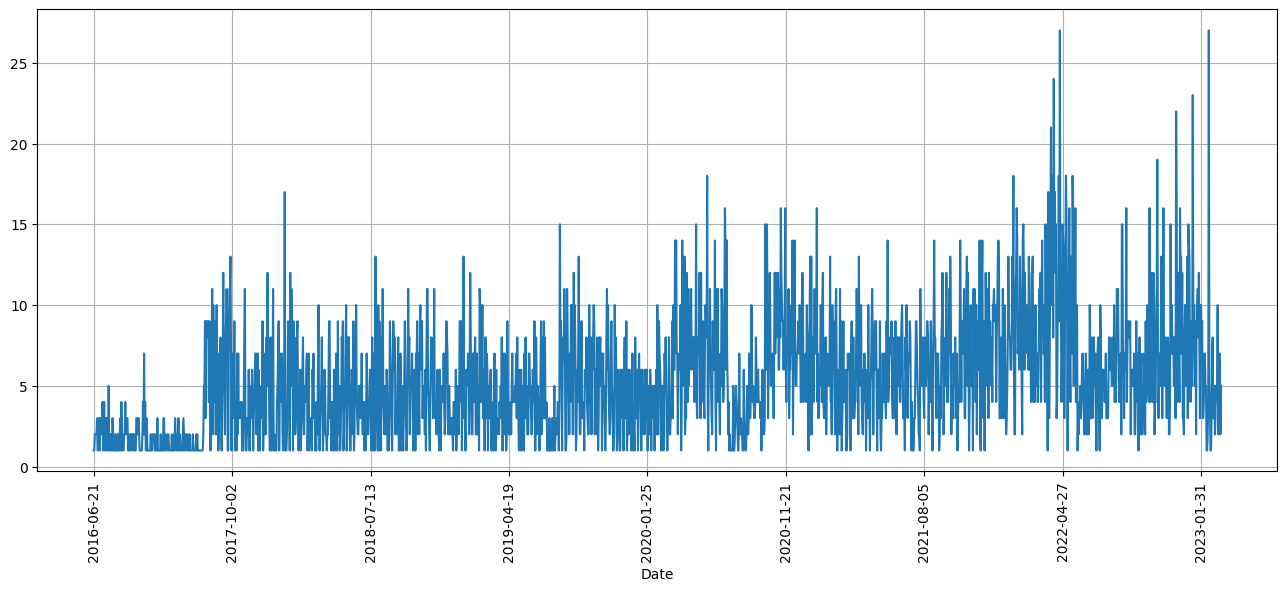

In [12]:
az_df.groupby('Date').size().plot(rot=90, figsize=[16,6],grid=True);

In [13]:
import pandas as pd

# Load the dataset
file_path = 'Resources/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(file_path, low_memory=False)

# Filter the data for the state of Arizona
df_arizona = df[df['State'] == 'AZ']

# Save the filtered data to a new CSV file
filtered_file_path = 'Resources/US_Accidents_March23_Arizona.csv'
df_arizona.to_csv(filtered_file_path, index=False)

# Print the number of rows in the filtered dataset
print(f"Number of rows in the Arizona dataset: {len(df_arizona)}")


Number of rows in the Arizona dataset: 11150


In [14]:
# Group by relevant columns and count accidents
accident_prone_areas = df_phoenix.groupby(['Start_Lat', 'Start_Lng', 'Street', 'City']).size().reset_index(name='Accident_Count')

# Sort by Accident_Count to find the most accident-prone areas
accident_prone_areas = accident_prone_areas.sort_values(by='Accident_Count', ascending=False)
print(accident_prone_areas.head(10))


NameError: name 'df_phoenix' is not defined

In [ ]:
# Count the number of accidents per city
accidents_per_city = df_phoenix['City'].value_counts().reset_index(name='Accident_Count')
accidents_per_city.columns = ['City', 'Accident_Count']
print(accidents_per_city)


In [ ]:
# Calculate the average severity per city
severity_per_city = df_phoenix.groupby('City')['Severity'].mean().reset_index(name='Average_Severity')
severity_per_city = severity_per_city.sort_values(by='Average_Severity', ascending=False)
print(severity_per_city)
